In [ ]:
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17
sudo apt-get install unixodbc-dev
pip install pyodbc
pip install chart_studio

OK
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease [4,002 B]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [26.7 kB]
Get:12 http://archi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100   983  100   983    0     0   3276      0 --:--:-- --:--:-- --:--:--  3265
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    79  100    79    0     0    512      0 --:--:-- --:--:-- --:--:--   512
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling

In [ ]:
!pip install pyemma

     |████████████████████████████████| 1.6 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81 kB 9.2 MB/s 
  Using cached deeptime-0.2.9-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 318 kB 68.9 MB/s 
     |████████████████████████████████| 603 kB 53.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached mdtraj-1.9.6-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (6.2 MB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
     |████████████████████████████████| 65 kB 3.7 MB/s 
  Created wheel for pyemma: filename=pyEMMA-2.5.9-cp37-cp37m-linux_x86_64.whl size=2498751 sha256=d34cb3d5db8d6e4e8a089d0d2d360b911701bf24c195521cc657452f291981c3
  Stored in directory: /root/.cache/pip/wheels/6a/30/8f/13aef118741687585d497f8b57e2c5e0be6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from pyemma import msm
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
from pyemma import msm
%matplotlib inline

In [ ]:
import pyodbc 
server = '13.211.197.103' 
database = 'temp_PMEData_subset' 
username = 'SA' 
password = '@#DT@LP911' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [ ]:
sql_powermeter = "select * from dbo.Query where SourceName = 'WP_SF_MVPS4.PM1'"
df_power = pd.read_sql(sql_powermeter, cnxn)

sql_weatherstation = "select * from dbo.Query where SourceName = 'WP_SF_MVPS4.WS1'"
df_weather = pd.read_sql(sql_weatherstation, cnxn)

In [ ]:
rslt_power = df_power[df_power['MeasurementName'] == 'Active Power']
df_final_activepower = rslt_power.resample('d', on='TimestampUTC').mean().dropna(how='all')
df_final_activepower.rename(columns={'Value':'activepower'}, inplace=True)

rslt_irradiance = df_weather[df_weather['MeasurementName'] == 'Irradiance Global (W/m^2)']
df_final_irradiance = rslt_irradiance.resample('d', on='TimestampUTC').mean().dropna(how='all')
df_final_irradiance.rename(columns={'Value':'irradiance'}, inplace=True)

rslt_rainfall = df_weather[df_weather['MeasurementName'] == 'Rainfall (mm)']
df_final_rainfall = rslt_rainfall.resample('d', on='TimestampUTC').mean().dropna(how='all')
df_final_rainfall.rename(columns={'Value':'rainfall'}, inplace=True)

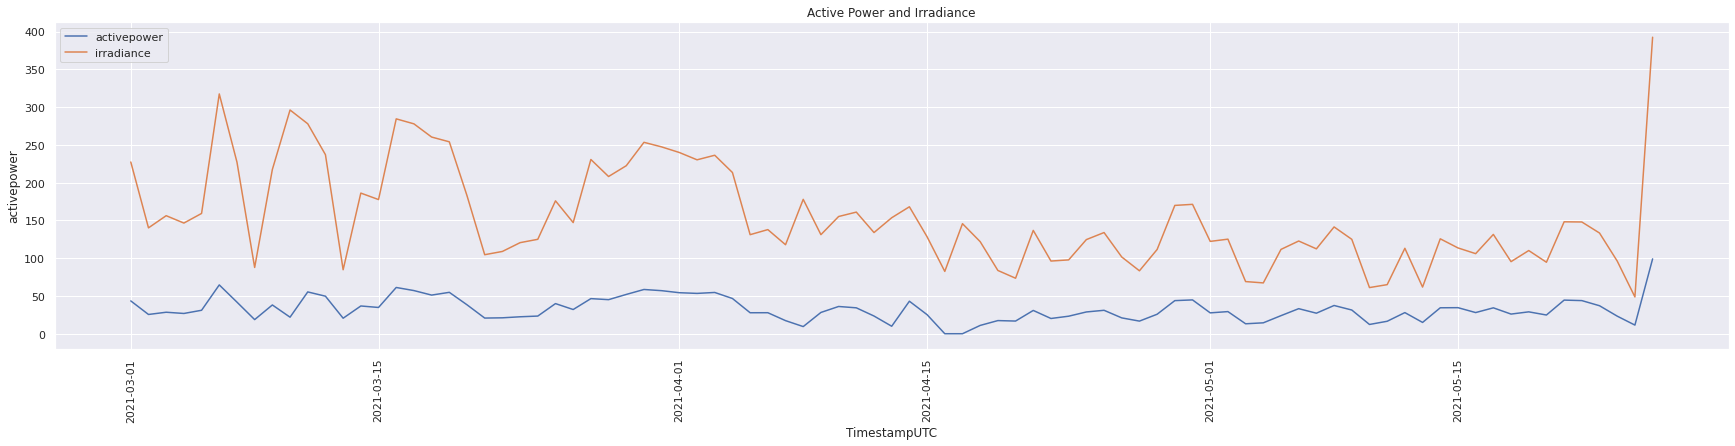

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,6)})

sns.lineplot(x="TimestampUTC", y="activepower", data=df_final_activepower, label="activepower")
sns.lineplot(x="TimestampUTC", y="irradiance", data=df_final_irradiance, label="irradiance")
plt.xticks(rotation=90)
plt.title('Active Power and Irradiance')
plt.show()

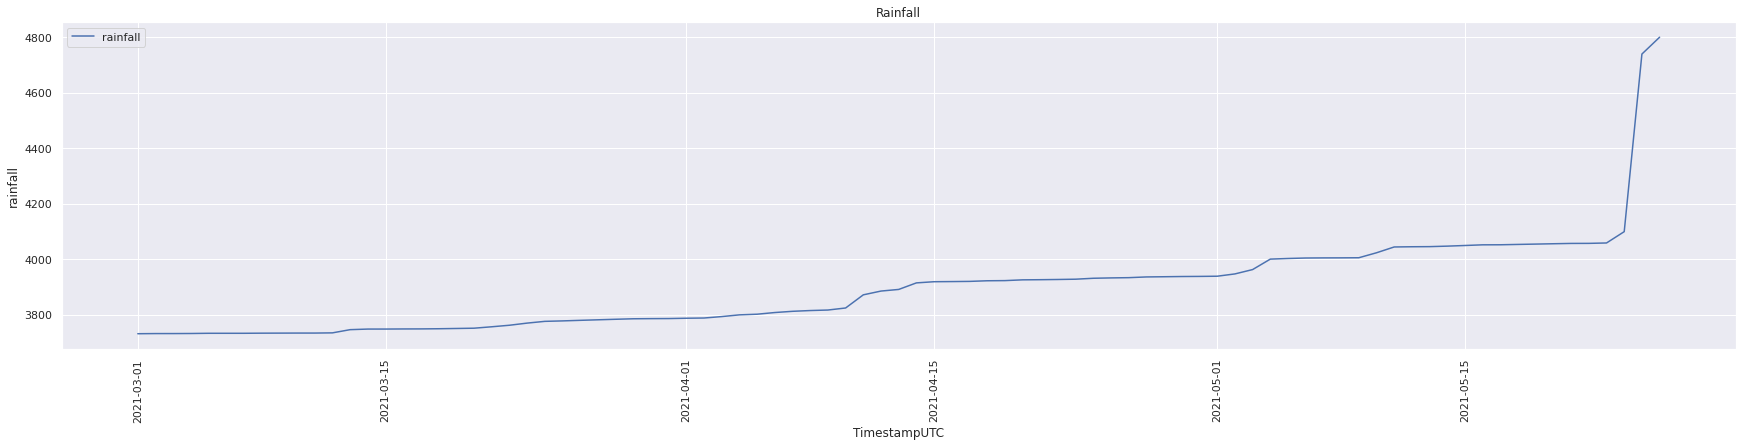

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,6)})

sns.lineplot(x="TimestampUTC", y="rainfall", data=df_final_rainfall, label="rainfall")
plt.xticks(rotation=90)
plt.title('Rainfall')
plt.show()

In [ ]:
df_timestamp = pd.DataFrame(data=rslt_power['TimestampUTC'].dt.date.unique())
df_timestamp.rename(columns={0:'date'}, inplace=True)
df_timestamp.head()

,date
0,2021-03-01
1,2021-03-02
2,2021-03-03
3,2021-03-04
4,2021-03-05


In [ ]:
df_timestamp.reset_index(drop=True, inplace=True)
df_final_activepower.reset_index(drop=True, inplace=True)
df_final_irradiance.reset_index(drop=True, inplace=True)
df_final_rainfall.reset_index(drop=True, inplace=True)

final_data = pd.concat([df_timestamp,df_final_activepower,df_final_irradiance,df_final_rainfall],join='outer', axis=1)
final_data.head()

,date,activepower,irradiance,rainfall
0,2021-03-01,43.436184,227.419355,3730.825806
1,2021-03-02,25.492922,140.189474,3731.372043
2,2021-03-03,28.450577,156.315789,3731.400000
3,2021-03-04,26.823645,146.542553,3731.645652
4,2021-03-05,31.050348,159.294737,3732.400000


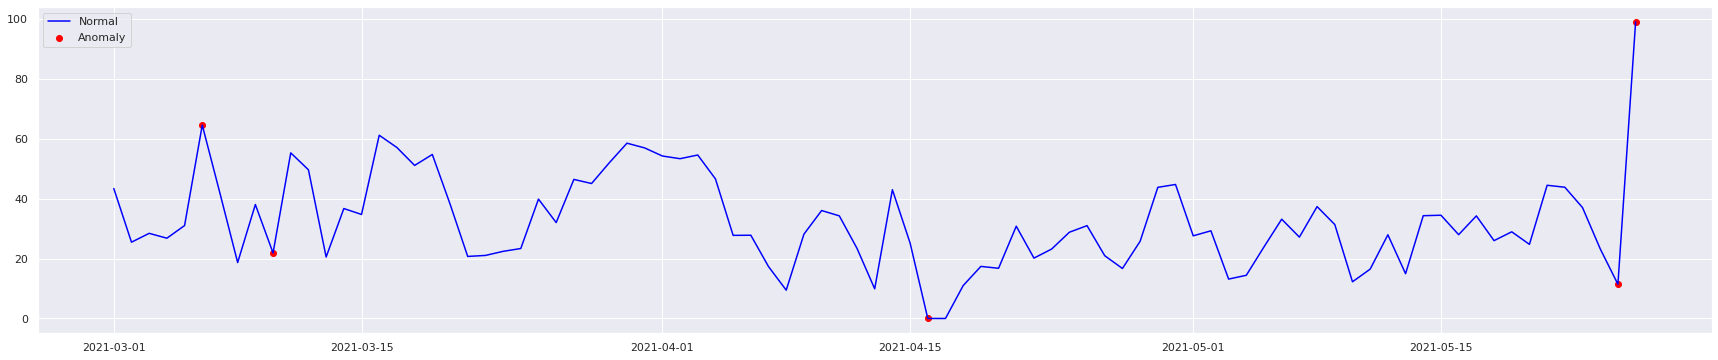

In [ ]:
data = final_data[['activepower', 'irradiance', 'rainfall']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
outliers_threshold = 0.05
model =  IsolationForest(contamination=outliers_threshold)
model.fit(data)

final_data['anomaly1'] = pd.Series(model.predict(data))
# df['anomaly2'] = df['anomaly2'].map( {1: 0, -1: 1} )

fig, ax = plt.subplots(figsize=(30,6))

a = final_data.loc[final_data['anomaly1'] == -1, ['date', 'activepower']] #anomaly

ax.plot(final_data['date'], final_data['activepower'], color='blue', label = 'Normal')
ax.scatter(a['date'],a['activepower'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [ ]:
final_data['anomaly1'].unique()

array([ 1, -1])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


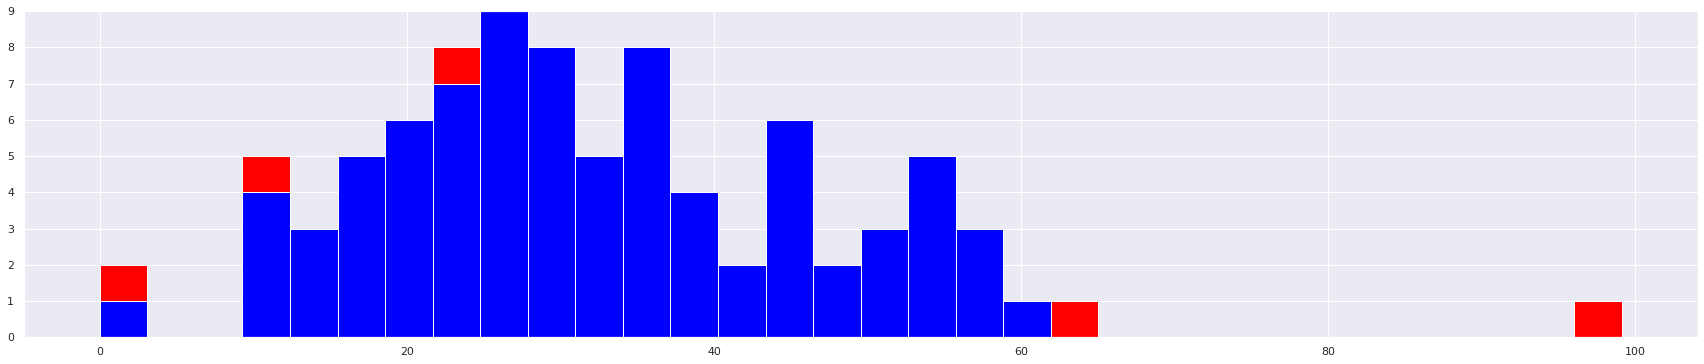

In [ ]:
# visualisation of anomaly with avg price repartition
a = final_data.loc[final_data['anomaly1'] == 1, 'activepower']
b = final_data.loc[final_data['anomaly1'] == -1, 'activepower']

fig, axs = plt.subplots(figsize=(30,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

In [5]:
import numpy as np

In [6]:
(2)

4

In [16]:
import numpy as np
li = []
for each in np.arange(0,5):
    li.append(1.5 * (1.05**each))


In [17]:
np.array(li) * 12 

array([18.       , 18.9      , 19.845    , 20.83725  , 21.8791125])

In [19]:
li

[1.5, 1.5750000000000002, 1.65375, 1.7364375, 1.8232593750000003]

In [20]:
sum(li) * 12

99.4613625

In [21]:
400 * 100

40000

In [25]:
(10000 * 16)

160000